In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import matthews_corrcoef,make_scorer
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import os
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def get_model(i):
    if i == '0':
        model = RandomForestClassifier(max_depth=15,n_estimators=50,bootstrap=False,max_features='auto')
    elif i=='1':
        model = RandomForestClassifier(max_depth=15,n_estimators=500,bootstrap=False,max_features='sqrt')
    elif i == '2':
        model = RandomForestClassifier(max_depth=20,n_estimators=50,bootstrap=False,max_features='sqrt')
    elif i == '3':
        model = RandomForestClassifier(max_depth=10,n_estimators=50,bootstrap=False,max_features='sqrt')
    elif i == '4':
        model = RandomForestClassifier(max_depth=20,n_estimators=500,bootstrap=False,max_features='auto')
    else:
        model = RandomForestClassifier(max_depth=10,n_estimators=500,bootstrap=False,max_features='auto')

    return model

In [ ]:
def model_train(train_data,test_data,d_n,ypred):

    param = {'n_estimators':[50,100,200,500,750,1000],'max_depth':[1,5,10,15,20],'max_features':['sqrt','auto','log2']}
    ypred1 = ypred
    test_cols = ['CO: 1','CO: 2','CO: 3','CO: 4','CO: 5','CO: 6']
    if d_n == 1:
      test_cols_1 = ['CO: 1','CO: 2']
    elif d_n == 2:
      test_cols_1 = ['CO: 3','CO: 4','CO: 5','CO: 6']
    
    
    X_train = train_data.drop(test_cols_1, axis=1, errors='ignore')
    y_train = train_data[test_cols_1]
    X_test = test_data.drop(test_cols_1, axis=1, errors='ignore')

    scaler = StandardScaler()
    scaledX_train = scaler.fit_transform(X_train).astype(float)
    scaledX_test = scaler.fit_transform(X_test).astype(float)

    X_train = scaledX_train
    X_test = scaledX_test

    #X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train, y_train, stratify=y_train,test_size = 0.2, random_state = 30)

    for i in range(len(test_cols_1)):
        y_train_1 = np.array(y_train[test_cols_1[i]])
        #y_val_11 = np.array(y_val_1[test_cols_1[i]])
        y_train_1 = y_train_1.reshape(y_train_1.shape[0],)
        #y_val_11 = y_val_11.reshape(y_val_11.shape[0],)
        
        #model_1 = GridSearchCV(RandomForestClassifier(),param)
        if test_cols_1[i][4] != '8':
          model_1 = get_model(test_cols_1[i][4])
          #model_1 = RandomForestClassifier(max_depth=5,max_features='sqrt')
          #model_1.fit(X_train_1,y_train_11)
          model_1.fit(X_train,y_train_1)
          print(test_cols_1[i],model_1.score(X_train,y_train_1))
          #print(test_cols_1[i],model_1.score(X_val_1,y_val_11))
          #print("MCC",matthews_corrcoef(y_val_11,model_1.predict(X_val_1)))
          ypred1.extend(model_1.predict(X_test))
        #print(model_1.best_params_)


    return ypred1



In [ ]:
def submission(pred):

  pred = np.array(pred)
  submission = pd.DataFrame(pred,columns=['Predicted'])
  submission.index.name = 'Id'
  submission.Predicted = np.array(pred,dtype=int)
  submission.to_csv('/content/gdrive/My Drive/prmldatacontest/RF(9_5).csv',index=True)
  print(submission.shape)


In [ ]:
#Importing Dataset
np.random.seed(42)
train_1 = pd.read_csv("/content/gdrive/My Drive/prmldatacontest/Dataset_1_Training.csv",index_col=0)
test_1 = pd.read_csv("/content/gdrive/My Drive/prmldatacontest/Dataset_1_Testing.csv",index_col=0)

train_2 = pd.read_csv("/content/gdrive/My Drive/prmldatacontest/Dataset_2_Training.csv",index_col=0)
test_2 = pd.read_csv("/content/gdrive/My Drive/prmldatacontest/Dataset_2_Testing.csv",index_col=0)


In [ ]:
pred = []
pred1 = model_train(train_1.T,test_1.T,1,pred)
pred2 = model_train(train_2.T,test_2.T,2,pred1) 

CO: 1 1.0
CO: 2 1.0
CO: 3 1.0
CO: 4 1.0
CO: 5 1.0
CO: 6 1.0


In [ ]:
#Submission
submission(pred2)

(1056, 1)


In [ ]:
nine_2 = pd.read_csv('/content/gdrive/My Drive/prmldatacontest/results (14).csv')
nine_2 = nine_2.drop('Id',axis=1,errors='ignore')
nine_2 = np.array(nine_2)
np.shape(nine_2)

(1056, 1)

In [84]:
k = 0
for j in range(len(pred2)):
    if pred2[j] != nine_2[j]:
      k = k+1
print(k)

79


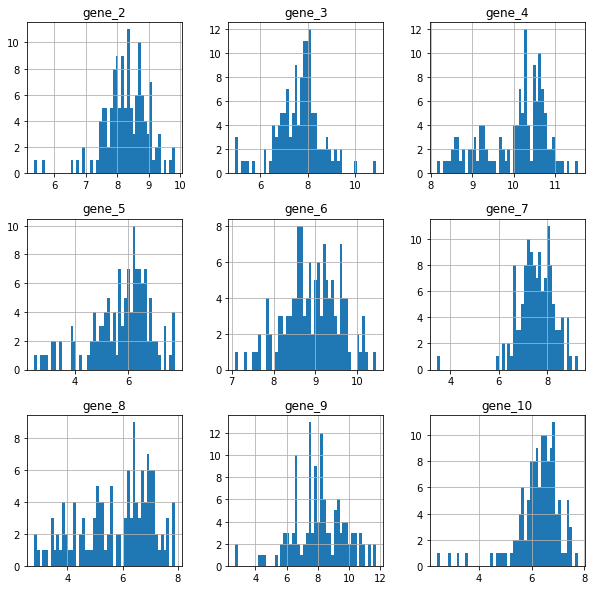

In [ ]:
train_small.hist(bins = 50, figsize = (10,10))
plt.show()